# Phase I: single nueron fiber Iclamp

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h
from neuron.units import ms, mV, um
h.load_file('stdrun.hoc') 

1.0

In [ ]:
axon = h.Section(name='axon')
axon.L = 20000 * um
axon.diam = 4 * um
axon.nseg = 1000
axon.Ra = 35.4
axon.cm = 1
axon.insert(h.hh)
axon.insert(h.pas)

for seg in axon:
    seg.pas.e = -65 * mV

In [45]:
iclamp = h.IClamp(axon(0))
iclamp.delay = 5 * ms
iclamp.dur = 20 * ms
# iclamp.amp = 10

In [46]:
ramp_t = h.Vector(np.arange(0 * ms, 30 * ms, 0.025 * ms))
ramp_amp = h.Vector(0.1*np.sin(ramp_t)) * 10
ramp_amp.play(iclamp._ref_amp, ramp_t, True) # last True says interpolate

Vector[32]

In [47]:
t = h.Vector().record(h._ref_t) # record time
v = h.Vector().record(axon(0.5)._ref_v) # position

In [48]:
h.finitialize(-65 * mV) # initial value
h.continuerun(100 * ms) # 20ms

0.0

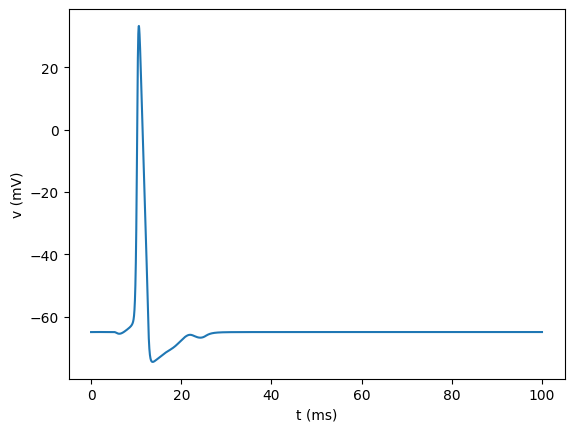

In [49]:
#  Action Potential
fig, ax = plt.subplots()
ax.plot(t, v)
ax.set_xlabel('t (ms)')
ax.set_ylabel('v (mV)')
plt.show()